<a href="https://colab.research.google.com/github/prav-kotte1/DM-Lab/blob/main/WIneOutliersDetectionIrisKNNDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Wine Dataset - Missing Values Handling & taksk

In [18]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [19]:
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
print("Path to dataset files:", path)
wine_df = pd.read_csv(f"{path}/winequality-red.csv", sep=",")
wine_df.head()

Using Colab cache for faster access to the 'red-wine-quality-cortez-et-al-2009' dataset.
Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
#mean-numerical, mode-categorical
for col in wine_df.columns:
    if wine_df[col].dtype in ['float64', 'int64']:
        wine_df[col].fillna(wine_df[col].mean(), inplace=True)
    else:
        wine_df[col].fillna(wine_df[col].mode()[0], inplace=True)

/tmp/ipython-input-3043655967.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine_df[col].fillna(wine_df[col].mean(), inplace=True)


In [21]:
Q1 = wine_df['alcohol'].quantile(0.25)
Q3 = wine_df['alcohol'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
wine_df = wine_df[(wine_df['alcohol'] >= lower) & (wine_df['alcohol'] <= upper)]

In [22]:
scaler = MinMaxScaler()
wine_df[['pH', 'residual sugar']] = scaler.fit_transform(wine_df[['pH', 'residual sugar']])

In [23]:
encoder = LabelEncoder()
wine_df['quality'] = encoder.fit_transform(wine_df['quality'])

print(wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00        0.068493      0.076   
1            7.8              0.88         0.00        0.116438      0.098   
2            7.8              0.76         0.04        0.095890      0.092   
3           11.2              0.28         0.56        0.068493      0.075   
4            7.4              0.70         0.00        0.068493      0.076   

   free sulfur dioxide  total sulfur dioxide  density        pH  sulphates  \
0                 11.0                  34.0   0.9978  0.606299       0.56   
1                 25.0                  67.0   0.9968  0.362205       0.68   
2                 15.0                  54.0   0.9970  0.409449       0.65   
3                 17.0                  60.0   0.9980  0.330709       0.58   
4                 11.0                  34.0   0.9978  0.606299       0.56   

   alcohol  quality  
0      9.4        2  
1      9.8        

Task 2: Iris Dataset Decision Tree Classifier & KNN Classifer

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
iris = load_iris(as_frame=True)
iris_df = iris.frame

X_iris = iris.data
y_iris = iris.target

In [26]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

In [27]:
dt_iris = DecisionTreeClassifier(random_state=42)
knn_iris = KNeighborsClassifier()

dt_iris.fit(X_train_iris, y_train_iris)
knn_iris.fit(X_train_iris, y_train_iris)

KNeighborsClassifier()

In [28]:
y_pred_dt_iris = dt_iris.predict(X_test_iris)
y_pred_knn_iris = knn_iris.predict(X_test_iris)

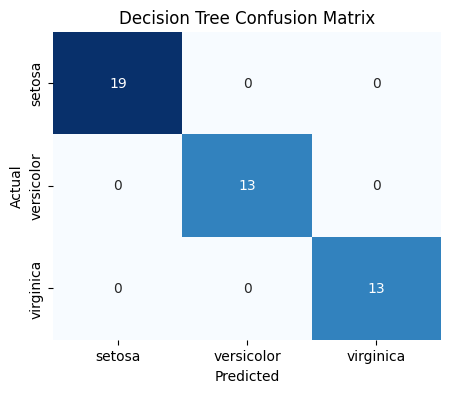

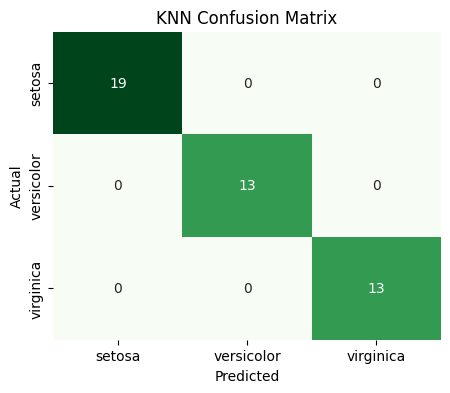


decisionTree report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

KNN report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [30]:
cm_dt = confusion_matrix(y_test_iris, y_pred_dt_iris)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


cm_knn = confusion_matrix(y_test_iris, y_pred_knn_iris)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

print("\ndecisionTree report:\n", classification_report(y_test_iris, y_pred_dt_iris))
print("KNN report:\n", classification_report(y_test_iris, y_pred_knn_iris))

In [31]:
y_test_bin_iris = label_binarize(y_test_iris, classes=[0,1,2])

In [32]:
y_score_dt_iris = dt_iris.predict_proba(X_test_iris)
auc_dt_iris = roc_auc_score(y_test_bin_iris, y_score_dt_iris, average="macro")
print("decisionTree AUC:", auc_dt_iris)

decisionTree AUC: 1.0


In [33]:
y_score_knn_iris = knn_iris.predict_proba(X_test_iris)
auc_knn_iris = roc_auc_score(y_test_bin_iris, y_score_knn_iris, average="macro")
print("KNN AUC:", auc_knn_iris)

KNN AUC: 1.0


/tmp/ipython-input-1740658749.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--', color="gray")


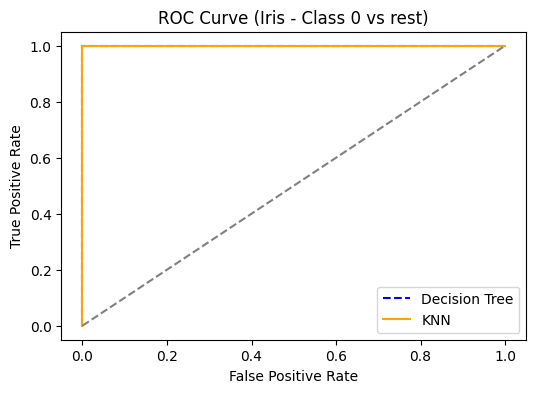

In [35]:
plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree", linestyle="--", color="blue")
plt.plot(fpr_knn, tpr_knn, label="KNN", linestyle="-", color="orange")
plt.plot([0,1],[0,1],'k--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Iris - Class 0 vs rest)")
plt.legend()
plt.show()